#2η Εργαστηριακή Άσκηση
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

## Προετοιμασία περιβάλλοντος

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/sna-data'

## Υλοποίηση συναρτήσεων

In [33]:
def degree(G):
    degrees = nx.degree_centrality(G)
    deg_vals = []
    for n in degrees:
      deg_vals.append(degrees[n])

    fig, ax = plt.subplots()
    _ = ax.hist(deg_vals)
    plt.title("Degree centrality histogram")
    plt.ylabel("Number of nodes")
    plt.xlabel("Degree centrality")
    plt.show()
    
    print("The mean of the degrees of nodes in the network is: {:.3f}".format(np.mean(deg_vals)))
    print("Standard deviation is: {:.3f}".format(np.std(deg_vals)))


def clustering(G, plot=True):
    node_clusters = nx.clustering(G)

    clustering_values = []
    for node in node_clusters:
      clustering_values.append(node_clusters[node])
    if plot:
      plt.hist(clustering_values)
      plt.title("Clustering coefficients histogram")
      plt.xlabel("Clustering coefficient")
      plt.ylabel("Number of nodes")
      plt.show()

    mean = np.mean(clustering_values)
    print("Mean clustering coeff: {:.3f}".format(mean))
    std = np.std(clustering_values)
    print("Standard deviation: {:.3f}".format(std))


def closeness(G):
    closeness = nx.closeness_centrality(G)
    cns_vals = []
    for n in closeness:
      cns_vals.append(closeness[n])

    fig, ax = plt.subplots()
    _ = ax.hist(cns_vals)
    plt.title("Closeness centrality histogram")
    plt.xlabel("Closeness centrality")
    plt.ylabel("Number of nodes")
    plt.show()
    
    print("The mean of closeness in the network is: {:.3f}".format(np.mean(cns_vals)))
    print("Standard deviation is: {:.3f}".format(np.std(cns_vals)))

## Α. Μελέτη πραγματικών τοπολογιών
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

### Παραγωγή συνθετικών τοπολογιών
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [5]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
seed = random.seed(seedno)

REG = nx.watts_strogatz_graph(n,d,0,seed=seed) 

RGER = nx.gnm_random_graph(n, M, seed=seed)
# repeat process until the network created is connected
while not nx.is_connected(RGER):
  RGER = nx.gnm_random_graph(n, M, seed=seed)

RGG = nx.random_geometric_graph(n, R, seed=seed)
while not nx.is_connected(RGG):
  RGG = nx.gnp_random_graph(n, p, seed=seed)

SF = nx.barabasi_albert_graph(n, d, seed=seed) 
while not nx.is_connected(SF):
  SF = nx.barabasi_albert_graph(n, d, seed=seed)

SW = nx.watts_strogatz_graph(n, d, p, seed=seed) 
while not nx.is_connected(SW):
  SW = nx.watts_strogatz_graph(n, d, p, seed=seed)

### Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.

Πρώτα διαβάζουμε το αρχείο [football.gml](https://helios.ntua.gr/pluginfile.php/43944/mod_assign/intro/football.gml) και το οπτικοποιούμε το δίκτυο που περιγράφει με τη βοήθεια της συνάρτησης draw_network.

In [6]:
#football network
football=nx.read_gml(r"{}/football.gml".format(path))

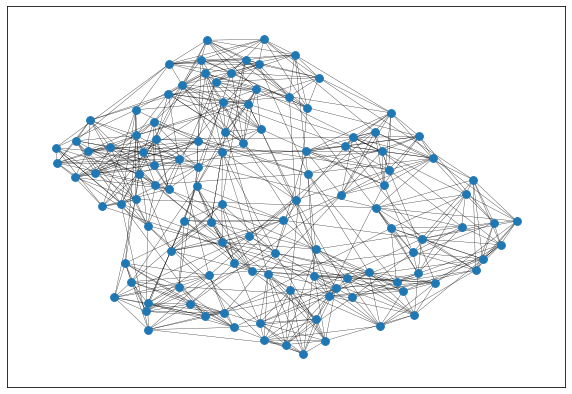

In [7]:
plt.figure(1, figsize=(10,7))
nx.draw_networkx(football, node_size=60, with_labels=False, width=.3)
plt.show()

Επαναλαμβάνουμε τη διαδικασία για το αρχείο [GoT](https://helios.ntua.gr/pluginfile.php/43944/mod_assign/intro/got_s5.csv).

In [8]:
#Game of thrones network
import csv
got=nx.Graph()
with open(path+'/got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

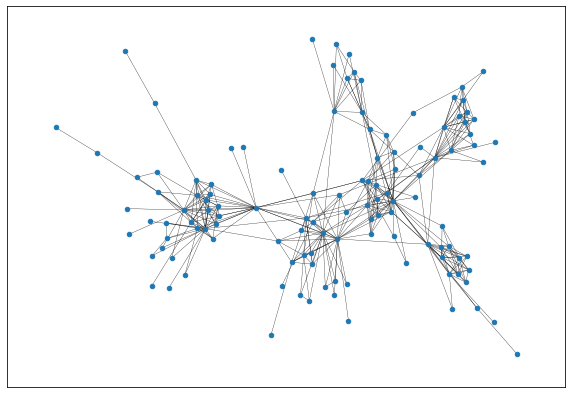

In [9]:
plt.figure(1, figsize=(10,7))
nx.draw_networkx(got, node_size=20, with_labels=False, width=.3)
plt.show()

Τέλος διαβάζουμε και οπτικοποιούμε και το δίκτυο που περιγράφεται στο αρχείο [email-Eu-core.txt](https://helios.ntua.gr/pluginfile.php/43944/mod_assign/intro/email-Eu-core.txt). Πριν την οπτικοποίηση και οποιαδήποτε εργασία στο δίκτυο αυτό θα αφαιρέσουμε τα self-loops και θα κρατήσουμε τη μεγαλύτερη συνεκτική συνιστώσα του αρχικού δικτύου.

In [10]:
#email-Eu-core network
eu=nx.read_edgelist(path+"/email-Eu-core.txt",create_using=nx.Graph())

In [11]:
eu.remove_edges_from(nx.selfloop_edges(eu))

largest_cc = max(nx.connected_components(eu), key=len)
eu = eu.subgraph(largest_cc).copy()

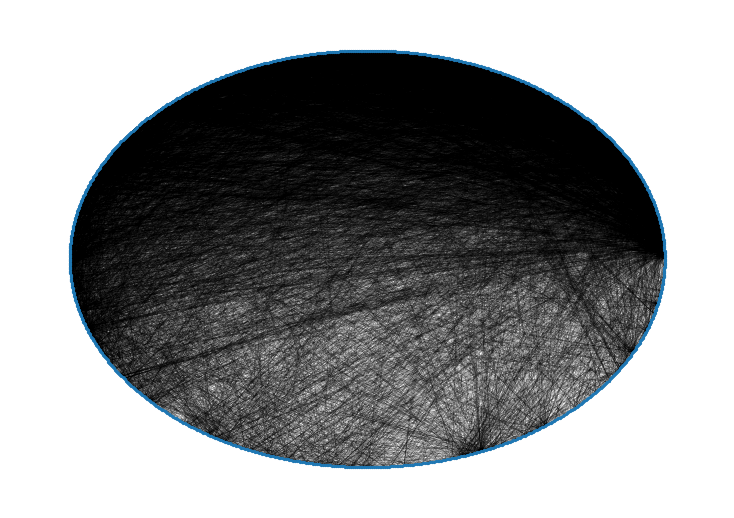

In [12]:
plt.figure(1, figsize=(10,7))
nx.draw_circular(eu, node_size=5, with_labels=False, width=.1)
plt.show()

### Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες

Πρώτα θα δείξουμε την κατανομή της κεντρικότητας βαθμών για τις συνθετικές τοπολογίες και ύστερα για τις πραγματικές, ώστε να μπορούμε να συγκρίνουμε ποιά συνθετική τοπολογία είναι πιο κοντά σε κάθε μία από τις πραγματικές. Θα κάνουμε χρήση της κεντρικότητας βαθμών (degree centrality) αντί των βαθμών (degree) κάθε κόμβου για να είναι τα συμπεράσματά μας ανεξάρτητα του μεγέθους του δικτύου που μελετάμε.



<h4>REG</h4>

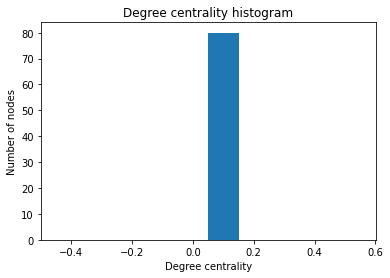

The mean of the degrees of nodes in the network is: 0.051
Standard deviation is: 0.000


In [13]:
degree(REG)

<h4>RGER</h4>


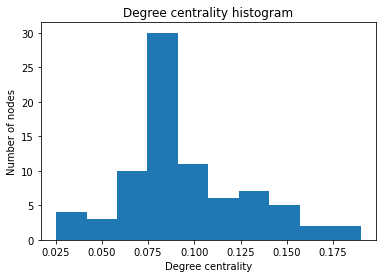

The mean of the degrees of nodes in the network is: 0.095
Standard deviation is: 0.034


In [14]:
degree(RGER)

<h4>RGG</h4>


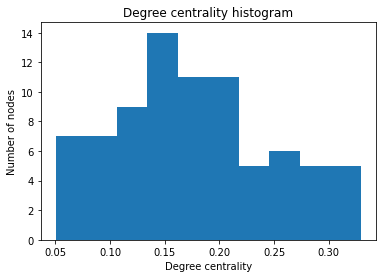

The mean of the degrees of nodes in the network is: 0.177
Standard deviation is: 0.070


In [15]:
degree(RGG)

<h4>SF</h4>


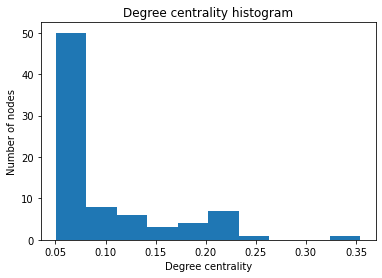

The mean of the degrees of nodes in the network is: 0.096
Standard deviation is: 0.061


In [16]:
degree(SF)

<h4>SW</h4>


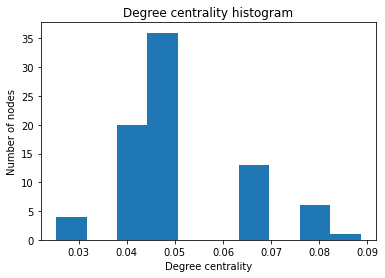

The mean of the degrees of nodes in the network is: 0.051
Standard deviation is: 0.013


In [17]:
degree(SW)

<h4>Football</h4>


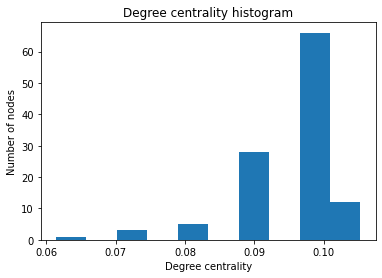

The mean of the degrees of nodes in the network is: 0.094
Standard deviation is: 0.008


In [18]:
degree(football)

Η μέση τιμή και η διασπορά της τοπολογίας αυτής μοιάζουν αρκετά με αυτές της τοπολογίας SF, όμως παρατηρούμε πως το ιστόγραμμα φαίνεται σαν να είναι "ανάποδα" στον άξονα x, αφού στο συνθετικό δίκτυο η ελάχιστη τιμή που λαμβάνει είναι η πιο συχνή, ενώ στο πραγματικό η πιο συχνή είναι η μέγιστη.

<h4>GoT</h4>

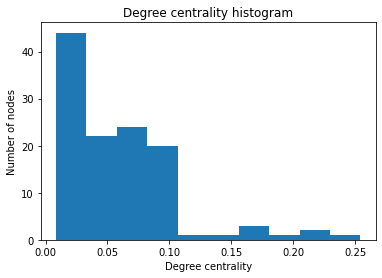

The mean of the degrees of nodes in the network is: 0.056
Standard deviation is: 0.047


In [19]:
degree(got)

Εδώ η μέση τιμή και η διασπορά μοιάζουν με τις τιμές του συνθετικού SW δικτύου, όμως το ιστόγραμμα φαίνεται να είναι πιο κοντά σε αυτό της τοπολογίας SF.

<h4>EU</h4>

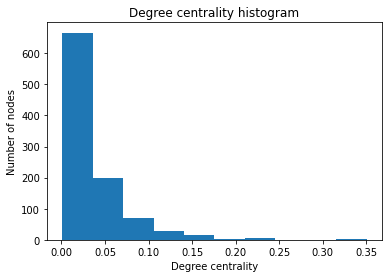

The mean of the degrees of nodes in the network is: 0.033
Standard deviation is: 0.038


In [20]:
degree(eu)

Το ιστόγραμμα της τοπολογίας αυτής είναι ίδιο με το ιστόγραμμα που είδαμε στην τοπολογία SF των συνθετικών δικτύων, με τη μέση τιμή και τη διασπορά να βρίσκονται αρκετά κοντά.

### Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες

<h4>REG</h4>

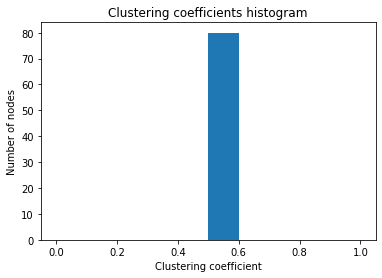

Mean clustering coeff: 0.500
Standard deviation: 0.000


In [21]:
clustering(REG)

<h4>RGER</h4>


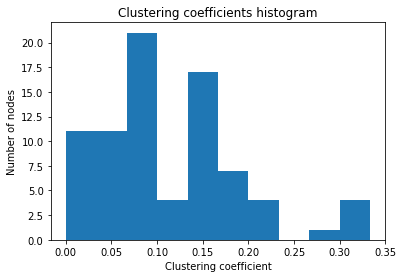

Mean clustering coeff: 0.108
Standard deviation: 0.078


In [22]:
clustering(RGER)

<h4>RGG</h4>


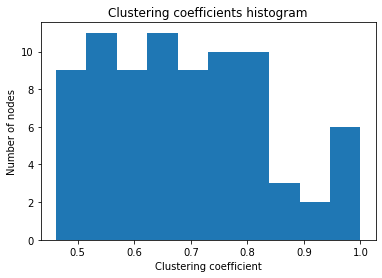

Mean clustering coeff: 0.689
Standard deviation: 0.141


In [23]:
clustering(RGG)

<h4>SF</h4>


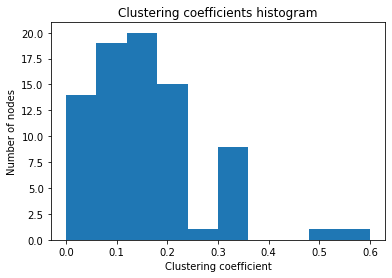

Mean clustering coeff: 0.154
Standard deviation: 0.110


In [24]:
clustering(SF)

<h4>SW</h4>


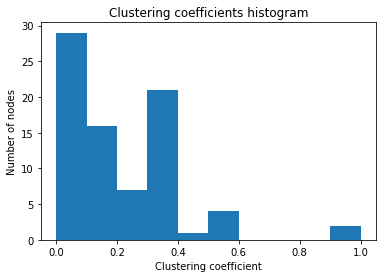

Mean clustering coeff: 0.194
Standard deviation: 0.201


In [25]:
clustering(SW)

<h4>Football</h4>


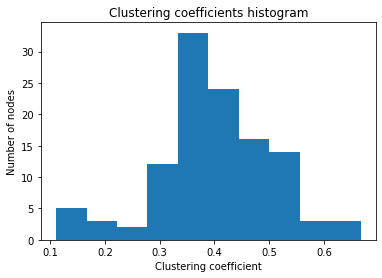

Mean clustering coeff: 0.403
Standard deviation: 0.104


In [26]:
clustering(football)

Η τοπολογία του δικτύου εμφανίζει υψηλή συγκέντρωση γύρω από τη μέση τιμή και λίγες τιμές μακριά από αυτή. Το ιστόγραμμα αυτό συναντάμε και στην τοπολογία RGER, όμως η μέση τιμή είναι κοντά σε αυτή της REG τοπολογίας.

<h4>GoT</h4>

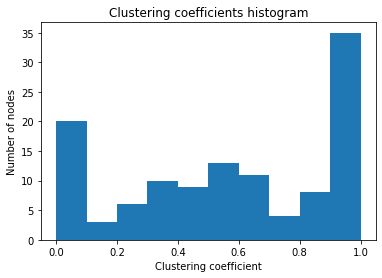

Mean clustering coeff: 0.574
Standard deviation: 0.355


In [27]:
clustering(got)

Το ιστόγραμμα της τοπολογίας αυτής δεν εμφανίζει ομοιότητες με τις συνθετικές τοπολογίες, καθώς έχουμε έντονη συγκέντρωση στα άκρα των τιμών (0 και 1). Εξαιρώντας αυτές έχουμε μία σχεδόν γκαουσιανή κατανομή γύρω από τη μέση τιμή, το οποίο μοιάζει κάπως με το ιστόγραμμα της τοπολογίας SF.

<h4>EU</h4>

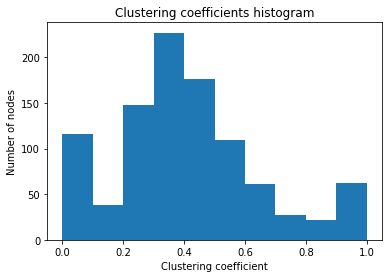

Mean clustering coeff: 0.407
Standard deviation: 0.248


In [28]:
clustering(eu)

Εδώ η ομοιότητα του ιστογράμματος με το ιστόγραμμα της τοπολογίας SF είναι αρκετά εμφανής, καθώς έχουμε μια σχεδόν γκαουσιανή κατανομή γύρω από τη μέση τιμή με ένα ελαφρύ skewing προς τις μικρότερες τιμές.

### Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες

<h4>REG</h4>

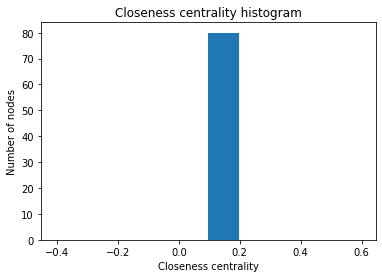

The mean of closeness in the network is: 0.096
Standard deviation is: 0.000


In [34]:
closeness(REG)

<h4>RGER</h4>


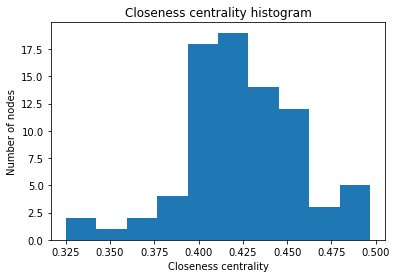

The mean of closeness in the network is: 0.425
Standard deviation is: 0.034


In [35]:
closeness(RGER)

<h4>RGG</h4>


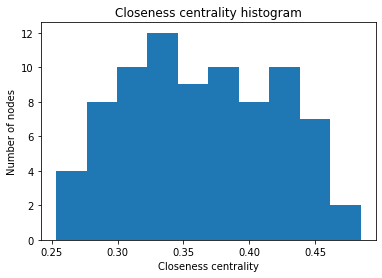

The mean of closeness in the network is: 0.364
Standard deviation is: 0.057


In [36]:
closeness(RGG)

<h4>SF</h4>


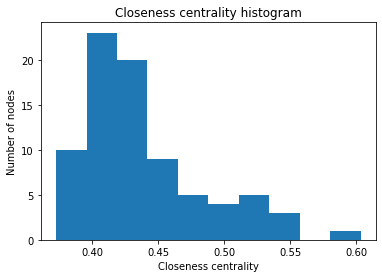

The mean of closeness in the network is: 0.439
Standard deviation is: 0.048


In [37]:
closeness(SF)

<h4>SW</h4>


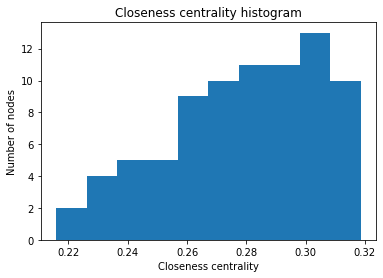

The mean of closeness in the network is: 0.279
Standard deviation is: 0.026


In [38]:
closeness(SW)

<h4>Football</h4>


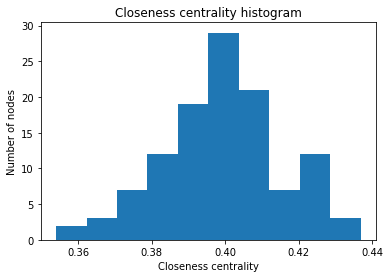

The mean of closeness in the network is: 0.399
Standard deviation is: 0.016


In [39]:
closeness(football)

Το ιστόγραμμα εμφανίζει αρκετές ομοιότητες με αυτό της τοπολογίας RGER, καθώς έχουμε μία γκαουσιανή κατανομή γύρω από τη μέση τιμή με skewing προς τις μεγαλύτερες τιμές.

<h4>GoT</h4>

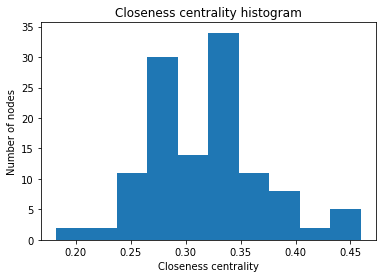

The mean of closeness in the network is: 0.319
Standard deviation is: 0.052


In [40]:
closeness(got)

Το ιστόγραμμα αυτό μοιάζει με το ιστόγραμμα της τοπολογίας SF, καθώς έχουμε γκαουσιανή κατανομή με skewing προς τις μικρότερες τιμές.

<h4>EU</h4>

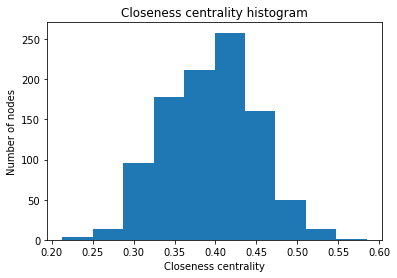

The mean of closeness in the network is: 0.394
Standard deviation is: 0.055


In [41]:
closeness(eu)

Όμοια με το δίκτυο GoT, και εδώ το ιστόγραμμα εμφανίζει ομοιότητα με το αντίστοιχο της τοπολογίας SF.

## B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [29]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [30]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

### Οπτικοποίηση κοινοτήτων στα δίκτυα που μελετήθηκαν

<h4>American College Football</h4>

<h4>Game of Thrones</h4>

<h4>email-Eu-core</h4>(να οπτικοποιηθεί και η ground-truth διαμέριση)

<h4>REG</h4>

<h4>RGER</h4>

<h4>RGG</h4>

<h4>RGGeo</h4>

<h4>SW</h4>

<h4>SF</h4>